In [1]:
#Importing the modules to be used
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [8]:
#Importing the csv file of our data
cars = pd.read_csv('cars.csv') 
#Showing the first five rows of our dataset
cars.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
#Getting the information of the DataFrame cars
cars.info()
#Getting the descriptive statistics of our data
print('\n\nStatistics \n')
print(cars.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Statistics 

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  

# *Analysing the relationship between weight and acceleration of the vehicles

In [14]:
#Extracting the two columns from the dataframe
cars[['weight', 'acceleration']]

,weight,acceleration
0,3504,12.0
1,3693,11.5
2,3436,11.0
3,3433,12.0
4,3449,10.5
...,...,...
393,2790,15.6
394,2130,24.6
395,2295,11.6
396,2625,18.6


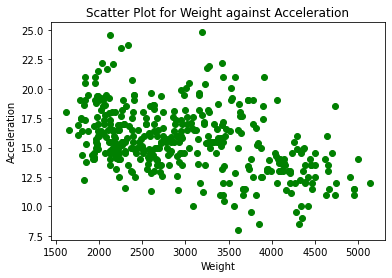

In [33]:
#Plotting the two variables with acceleration on the x axis and weight on the y axis
plt.scatter(cars['weight'], cars['acceleration'], color = 'g')
plt.xlabel('Weight')
plt.ylabel('Acceleration')
plt.title('Scatter Plot for Weight against Acceleration')
plt.show()

From the scatter plot above it shows that as the weight of the vehicles increases the acceleration of the same decreases. This points out a negative correlation between the acceleration and weight of the motor vehicles. To futher find the degree of the negative association we employ the Pearson Correlation Coefficient, which is indicated in the line below

In [34]:
#Using Numpy module to find the correlation between the two variables, weight and acceleration 
np.corrcoef(cars['weight'], cars['acceleration'])

array([[ 1.        , -0.41745732],
       [-0.41745732,  1.        ]])

The 2x2 matrix above shows a coefficient matrix, and confirms that there is a negative correlation between the two variables of the magnitude -0.417 approximately. 

This means that as the weight of the observed motor vehicles is increasing the acceleration of the observed motor vehicles tend to decrease, and the same goes with the decrease in weight being witnessed by an increase in the acceleration. 

# *Vehicles manufactured over the years

In [35]:
cars.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [71]:
# Statistics of vehicles produced over the years 
from collections import Counter
years = cars['model_year'].value_counts()
years

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model_year, dtype: int64

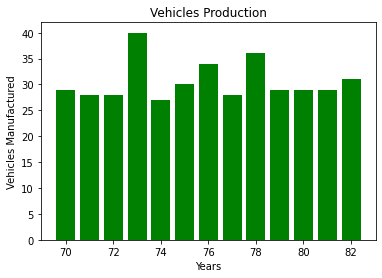

In [87]:
#Plotting the graph of vehicles produced over the years
plt.bar(years.index, years, color = 'green')
plt.xlabel('Years')
plt.ylabel('Vehicles Manufactured')
plt.title('Vehicles Production')
plt.show()

In [54]:
#Evaluating the quantities of vehicles produced by origin
origin = cars['origin'].value_counts()
origin 

usa       249
japan      79
europe     70
Name: origin, dtype: int64

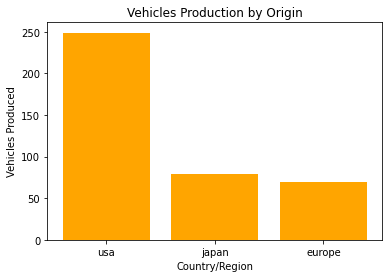

In [89]:
#Plotting the graph
plt.bar(origin.index, origin, color = 'orange') 
plt.xlabel('Country/Region')
plt.ylabel('Vehicles Produced')
plt.title('Vehicles Production by Origin')
plt.show()

In [93]:
cars.weight

0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
393    2790
394    2130
395    2295
396    2625
397    2720
Name: weight, Length: 398, dtype: int64

In [161]:
#Number of bins using the formula - squareroot(number of observations) then round up 

bins = np.sqrt(len(cars.weight))

d = cars['weight'].max() - cars['weight'].min()
bin_width = d / bins 

print('Number of bins is :', bins)
print('Bin width is :', bin_width)

Number of bins is : 19.949937343260004
Bin width is : 176.79253520019606


In [162]:
#Exploring the bins of the data
hist = pd.qcut(cars.weight, 20)
hist

0       (3424.5, 3608.0]
1       (3608.0, 3806.0]
2       (3424.5, 3608.0]
3       (3424.5, 3608.0]
4       (3424.5, 3608.0]
             ...        
393    (2670.65, 2803.5]
394    (2093.25, 2155.0]
395    (2223.75, 2301.0]
396    (2580.6, 2670.65]
397    (2670.65, 2803.5]
Name: weight, Length: 398, dtype: category
Categories (20, interval[float64]): [(1612.999, 1923.5] < (1923.5, 1988.5] < (1988.5, 2093.25] < (2093.25, 2155.0] ... (3806.0, 4067.65] < (4067.65, 4275.2] < (4275.2, 4464.0] < (4464.0, 5140.0]]

In [163]:
#Observing the counts or number of observations in each bin
hist.value_counts()

(2093.25, 2155.0]     22
(4275.2, 4464.0]      21
(1612.999, 1923.5]    20
(1923.5, 1988.5]      20
(4067.65, 4275.2]     20
(3806.0, 4067.65]     20
(3608.0, 3806.0]      20
(3424.5, 3608.0]      20
(3085.2, 3250.7]      20
(2937.2, 3085.2]      20
(2803.5, 2937.2]      20
(2670.65, 2803.5]     20
(2580.6, 2670.65]     20
(2429.5, 2580.6]      20
(2223.75, 2301.0]     20
(1988.5, 2093.25]     20
(3250.7, 3424.5]      19
(2301.0, 2429.5]      19
(4464.0, 5140.0]      19
(2155.0, 2223.75]     18
Name: weight, dtype: int64

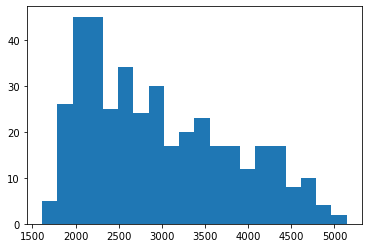

In [188]:
#Plotting the histogram using the plt function from the matplotlib library
plt.hist(cars.weight, 20)
plt.show()

In [201]:
#Generating a list for normally distributed numbers to test the histogram plot accuracy against the bar plot
z = np.random.randn(20)

max = z.max()
min = z.min() 
print(z)
print('\n')
print('Maximum number is:', max) 
print('Minimum number is:', min)
print('Bins width is (max - min) / len(z)):', (max - min) / len(z))


[ 0.69281926  0.57336081 -0.71803969  0.33606764  0.78224183 -0.21374808
 -0.88020345  0.65165077 -0.49826232  0.94993552  0.46592    -1.83194075
 -0.10149241  0.26800318  0.05606698 -0.1879125   1.11601651  0.7160548
 -0.69532745  1.12441704]


Maximum number is: 1.1244170406533867
Minimum number is: -1.8319407503469798
Bins width is (max - min) / len(z)): 0.14781788955001832


In [156]:
#Finding the squareroot of the total number of observations to determine the number of bins
np.sqrt(20) #Rounding up the number of bins gives us 5 

4.47213595499958

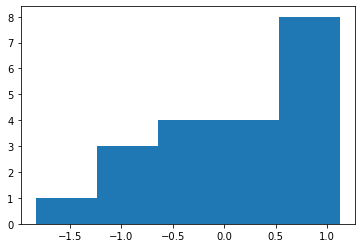

In [202]:
#Plotting the histogram using plt.hist() function 
plt.hist(z, 5)
plt.show()

In [203]:
z

array([ 0.69281926,  0.57336081, -0.71803969,  0.33606764,  0.78224183,
       -0.21374808, -0.88020345,  0.65165077, -0.49826232,  0.94993552,
        0.46592   , -1.83194075, -0.10149241,  0.26800318,  0.05606698,
       -0.1879125 ,  1.11601651,  0.7160548 , -0.69532745,  1.12441704])

In [204]:
zbins = pd.cut(z, 5)
zbins

[(0.533, 1.124], (0.533, 1.124], (-1.241, -0.649], (-0.0581, 0.533], (0.533, 1.124], ..., (-0.649, -0.0581], (0.533, 1.124], (0.533, 1.124], (-1.241, -0.649], (0.533, 1.124]]
Length: 20
Categories (5, interval[float64]): [(-1.835, -1.241] < (-1.241, -0.649] < (-0.649, -0.0581] < (-0.0581, 0.533] < (0.533, 1.124]]

In [205]:
zbins.value_counts()

(-1.835, -1.241]     1
(-1.241, -0.649]     3
(-0.649, -0.0581]    4
(-0.0581, 0.533]     4
(0.533, 1.124]       8
dtype: int64